In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score
data=pd.read_csv("titanic-passengers.csv", sep=';')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [6]:
data["Survived"]=data["Survived"].map({"Yes": 1, "No": 0})
data["Sex"]=data["Sex"].map({"male" : 0, "female" : 1})
data.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'], axis=1, inplace=True)
data['Family_members'] = data['Parch'] + data ['SibSp']
data.drop(['SibSp','Parch'], axis=1, inplace=True)
data["Age"].fillna(data["Age"].mean(), axis=0, inplace= True)
data

,Survived,Pclass,Sex,Age,Family_members
0,0,2,0,28.000000,0
1,0,3,0,25.000000,0
2,0,3,0,20.000000,0
3,0,3,1,29.000000,4
4,0,1,0,31.000000,1
...,...,...,...,...,...
886,1,2,1,14.000000,1
887,0,3,0,22.000000,0
888,0,3,1,30.000000,0
889,0,3,0,29.699118,0


In [8]:
data.isnull().sum()

Survived          0
Pclass            0
Sex               0
Age               0
Family_members    0
dtype: int64

In [9]:
data.groupby('Survived').mean()

,Pclass,Sex,Age,Family_members
Survived,,,,
0,2.531876,0.147541,30.415100,0.883424
1,1.950292,0.681287,28.549778,0.938596


In [11]:
#Unbalanced DATA
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
X=data[['Sex','Age','Family_members','Pclass']]
Y=data.Survived

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=20)

logreg= LogisticRegression()
logreg.fit(x_train, y_train)

predicted = logreg.predict(x_test)

cf = confusion_matrix(y_test, predicted)
AS = accuracy_score(y_test, predicted)
F1S = f1_score(y_test, predicted)

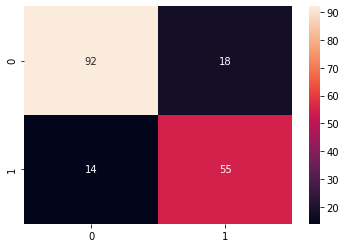

In [13]:
sns.heatmap(cf, annot=True)

In [14]:
print ('accuracy = ', AS)
print ("f1 = ", F1S)

accuracy =  0.8212290502793296
f1 =  0.7746478873239437


In [15]:
metrics.classification_report(y_test, predicted)

'              precision    recall  f1-score   support\n\n           0       0.87      0.84      0.85       110\n           1       0.75      0.80      0.77        69\n\n    accuracy                           0.82       179\n   macro avg       0.81      0.82      0.81       179\nweighted avg       0.82      0.82      0.82       179\n'

No handles with labels found to put in legend.


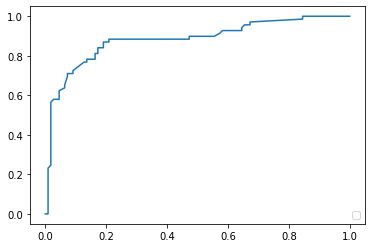

In [16]:
predicted2 = logreg.predict_proba(x_test)[::,1]

ax, ay, z = metrics.roc_curve(y_test, predicted2)

plt.plot(ax, ay)
plt.legend(loc=4)
plt.show()

In [17]:
print ("ROC AUC SCORE = ", metrics.roc_auc_score(y_test, predicted2))


ROC AUC SCORE =  0.8823451910408433


In [21]:
predicted3 = predicted2

for i in range(0,len(predicted3)) :
  
    #Nouveau seuil a 0.45 !!!!!!
    if predicted3[i] > 0.45 :
        predicted3[i] = 1
    else :
        predicted3[i] = 0

AS2 = accuracy_score(y_test, predicted3)
F1S2 = f1_score(y_test, predicted3)
cf2 = confusion_matrix(y_test, predicted3)

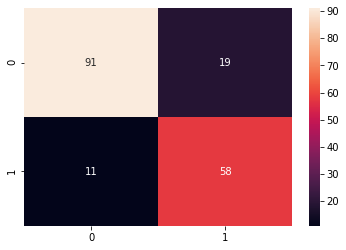

In [19]:
sns.heatmap(cf2, annot=True)

In [20]:
print ('accuracy = ', AS2)
print ("f1 = ", F1S2)
print ("ROC AUC SCORE = ", metrics.roc_auc_score(y_test, predicted3))

accuracy =  0.8324022346368715
f1 =  0.7945205479452054
ROC AUC SCORE =  0.8339262187088273
